In [22]:
import os
import pandas as pd
import warnings
import Hindcast_Initialization
import FigureDeveloper

warnings.filterwarnings("ignore")

In [53]:
import importlib
importlib.reload(FigureDeveloper)

<module 'FigureDeveloper' from '/home/jovyan/NSM/Snow-Extrapolation/contributors/Neural_Network/FigureDeveloper.py'>

In [2]:
#Get datetime and corresponding background information to evaluate hindcast
#Need to load predictions2022-09-24.h5, 2019_predictions.h5 (if straight to here and did not make predictions)  

new_year = '2019'
threshold = '20.0'
Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','Greater_Yellowstone', 
     'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade',
     'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 
     'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast',
     'Greater_Glacier', 'Or_Coast'
              ]



datelist = Hindcast_Initialization.Hindcast_Initialization(new_year, threshold, Region_list, SCA = True)
EvalDF = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list)

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low', 'Greater_Yellowstone', 'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade', 'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast', 'Greater_Glacier', 'Or_Coast'  regions for water year  2019
New simulation start files complete


In [44]:
Model_Results = FigureDeveloper.Dict_2_DF(EvalDF, Region_list)
Model_Results.head()

,y_test,y_pred,Region,Date,y_test_prev,prev_SWE,Long,Lat,elevation_m,WYWeek,northness,VIIRS_SCA,hasSnow,prev_SWE_error,y_pred_fSCA,error
00c4db22-a423-41a4-ada6-a8b1b04153a4,6.858,6.345891,Northern Sierra Nevada,2018-12-11,0.0,3.126141,-121.939413,41.166647,1661.50,10.0,-0.167901,55.500000,True,-1.230764,6.345891,0.512109
018cf1a1-f945-4097-9c47-0c4690538bb5,17.780,11.836114,Northern Sierra Nevada,2018-12-11,0.0,9.369792,-120.618890,39.675880,2057.50,10.0,-0.006909,55.500000,True,-3.688895,11.836114,5.943886
147d5eb4-e574-47e4-994a-8a2908c06050,11.176,10.136002,Northern Sierra Nevada,2018-12-11,0.0,7.414897,-120.879401,39.786417,2013.00,10.0,0.011996,70.166667,True,-2.919251,10.136002,1.039998
6dd37e24-0a9c-4749-8ab6-7e26d42925d6,10.160,7.324362,Northern Sierra Nevada,2018-12-11,0.0,4.214519,-121.786700,40.780052,1787.00,10.0,-0.191108,56.500000,True,-1.659260,7.324362,2.835638
76b55900-eb3d-4d25-a538-f74302ffe72d,15.494,17.716970,Northern Sierra Nevada,2018-12-11,0.0,13.316321,-120.178716,41.993149,2261.25,10.0,0.039906,100.000000,True,-5.242646,17.716970,-2.222970


In [30]:
Maritime_Region, Prairie_Region, Alpine_Region, Snow_Class = FigureDeveloper.Sturm_Classified_Performance(Model_Results)

Maritime  RMSE:  26.197997732123447  R2:  0.682071795077995 pbias: [17.48015668]
Alpine  RMSE:  11.83973927988033  R2:  0.7328582916047117 pbias: [0.3202527]
Prairie  RMSE:  11.693966325950992  R2:  0.7146062915478124 pbias: [-4.90691787]


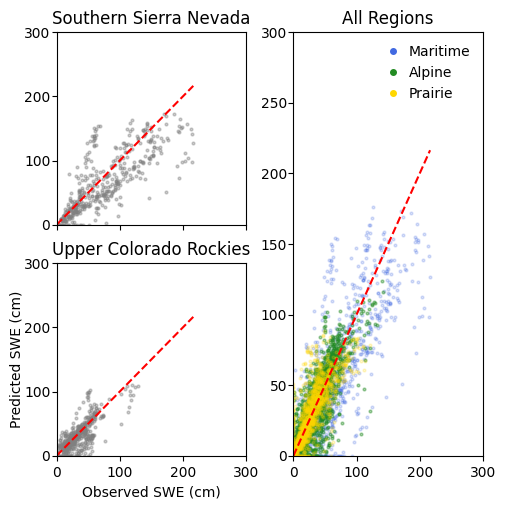

In [40]:
FigureDeveloper.Slurm_Class_parity(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region)

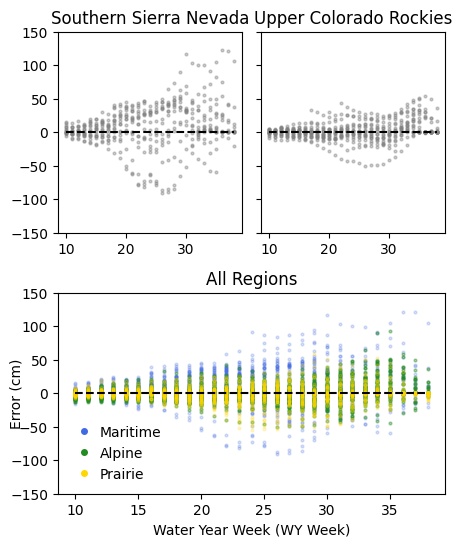

In [54]:
FigureDeveloper.EvalPlots3(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region, 'WYWeek', 'error', 'Water Year Week (WY Week)', 'Error (cm)', 'ErrorVsWYWeek', 2)

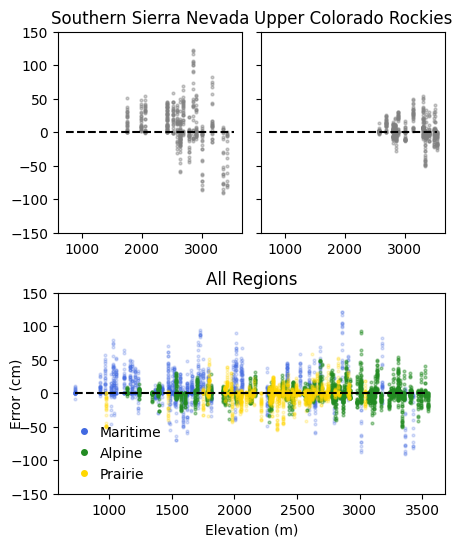

In [55]:
FigureDeveloper.EvalPlots3(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region,'elevation_m', 'error', 'Elevation (m)', 'Error (cm)', 'ErrorVsElevation', 2)

In [122]:
def SSM_Fig(datelist, Region_list,variant):
    
    #Load prediction file with geospatial information
    path = f"./Predictions/Hold_Out_Year/Prediction_DF_SCA_2018-10-02.pkl"
    geofile =open(path, "rb")
    geofile = pickle.load(geofile)
    cols = ['Long', 'Lat']

    #convet to one dataframe
    geo_df = pd.DataFrame()
    for Region in Region_list:
        geofile[Region] = geofile[Region][cols]
        geo_df = pd.concat([geo_df, geofile[Region]])

    #convert to geodataframe
    geo_df = gpd.GeoDataFrame(
        geo_df, geometry=gpd.points_from_xy(geo_df.Long, geo_df.Lat), crs="EPSG:4326"
    )

    path = f"./Predictions/Hold_Out_Year/2019_predictions.h5"
    #get predictions for each timestep
    print('processing predictions into geodataframe')
    for date in tqdm(datelist):
        pred = pd.read_hdf(path, key = date)
        geo_df[date] = pred[date]*2.54 #convert to cm


    #convert to correct crs.
    geo_df = geo_df.to_crs(epsg=3857)

    print('creating figures for each prediction timestep') #This could be threaded/multiprocessed to speed up
    for date in tqdm(datelist):
    #date = "2019-03-26"
        cols = ['geometry', date]
        plotdf = geo_df[cols]
        fig, ax = plt.subplots(figsize=(10, 10))
        #plot only locations with SWE
        plotdf = plotdf[plotdf[date] > 0]
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        ax = plotdf.plot(date, 
                     figsize=(3, 5), 
                     alpha=0.5, 
                     markersize = 6,
                     edgecolor="k", 
                     vmin =1, 
                     vmax =250,
                    legend = True,
                    legend_kwds={"label": "Snow Water Equivalent (cm)", "orientation": "vertical"},
                    ax = ax,
                    cax= cax)
        ax.set_xlim(-1.365e7, -1.31e7)
        #ax.set_ylim(4.25e6, 5.25e6)
        ax.set_ylim(4.32e6, 4.62e6)
        cx.add_basemap(ax, source="https://server.arcgisonline.com/ArcGIS/rest/services/"+variant+"/MapServer/tile/{z}/{y}/{x}")   #cx.providers.OpenStreetMap.Mapnik)
        ax.set_axis_off()
        ax.text(-1.345e7, 4.64e6, f"SWE estimate: {date}", fontsize =14)
        #plt.title( f"SWE estimate: {date}", fontsize =14)
        #plt.title(f"SWE estimate: {date}")
        plt.savefig(f"./Predictions/Hold_Out_Year/Paper_Figures/SWE_{date}.png", dpi =600, bbox_inches='tight')
        plt.show()
        plt.close(fig)
        
            

processing predictions into geodataframe


100%|██████████| 1/1 [00:00<00:00, 27.75it/s]


creating figures for each prediction timestep


  0%|          | 0/1 [00:00<?, ?it/s]

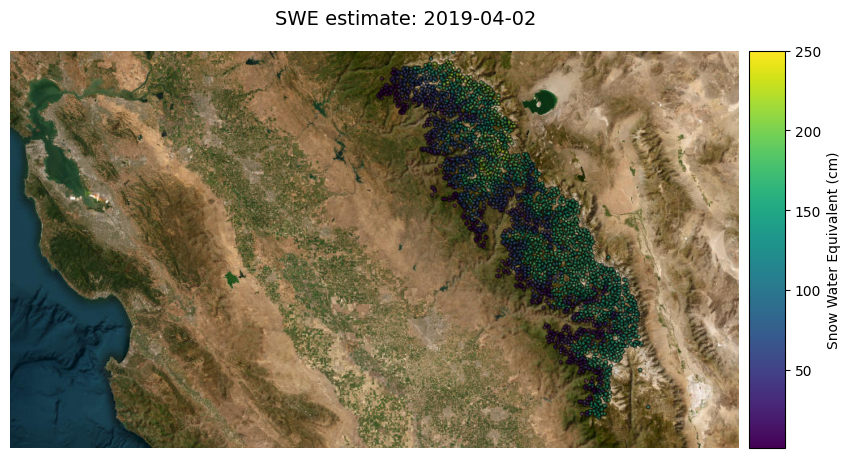

100%|██████████| 1/1 [00:08<00:00,  8.47s/it]


In [123]:
import pickle
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import contextily as cx
import xyzservices.providers as xyz
from mpl_toolkits.axes_grid1 import make_axes_locatable

Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low']
#Get list of optional tiles here: https://contextily.readthedocs.io/en/latest/providers_deepdive.html
variant = 'World_Imagery'#   'World_Physical_Map'
date = ["2019-04-02"]
SSM_Fig(date, Region_list,variant)